# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

# **Visualize a story in Tableau and Python**

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



1- Indentifying them through visualizations such as box plots or histogram. 2- IQR any point falls below 25th percentile or above the 75th percentile are considered outliers. the decision to keep or exclude outliers depends on the nature of dataset 

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

In [4]:
# Display and examine the first few rows of the dataframe
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
# Get the size of the data
data.size


232584

In [6]:
# Get the shape of the data
data.shape


(19382, 12)

In [7]:
# Get basic information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [208]:
# Generate a table of descriptive statistics
data.describe()




,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

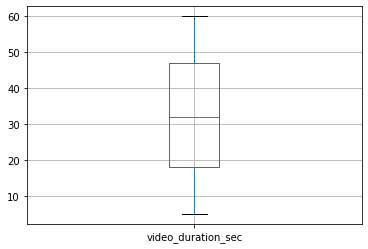

In [14]:
# Create a boxplot to visualize distribution of `video_duration_sec`

data.boxplot(column='video_duration_sec')

plt.show()


Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video_duration_Histogram')

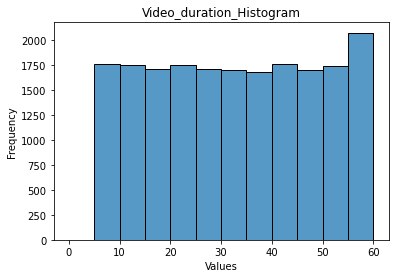

In [304]:
# Create a histogram

sns.histplot(data.video_duration_sec, bins=range(0,61,5))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Video_duration_Histogram')


#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

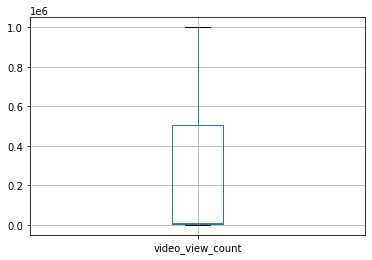

In [23]:
# Create a boxplot to visualize distribution of `video_view_count`

data.boxplot(column='video_view_count')

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video_view_count_Histogram')

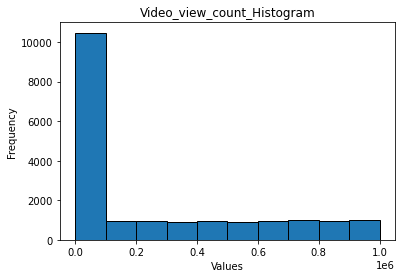

In [25]:
# Create a histogram

plt.hist(data.video_view_count, bins=10, edgecolor='Black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Video_view_count_Histogram')


#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

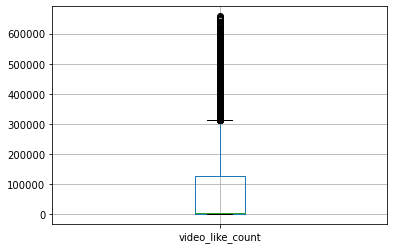

In [29]:
# Create a boxplot to visualize distribution of `video_like_count`

data.boxplot(column='video_like_count')

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video_like_count_Histogram')

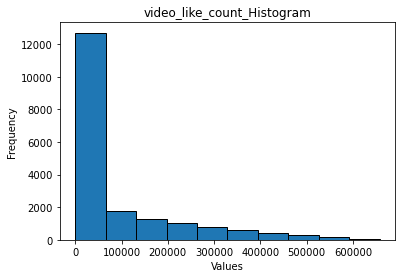

In [30]:
# Create a histogram

plt.hist(data.video_like_count, bins=10, edgecolor='Black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('video_like_count_Histogram')


**Question:** What do you notice about the distribution of this variable?

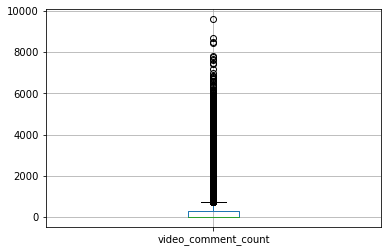

In [33]:
# Create a boxplot to visualize distribution of `video_comment_count`

data.boxplot(column='video_comment_count')

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video_comment_count_Histogram')

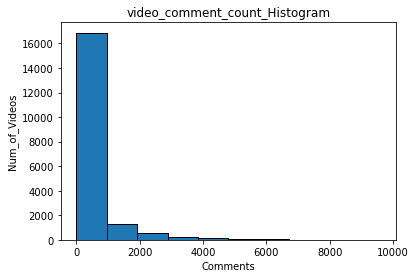

In [36]:
# Create a histogram

plt.hist(data.video_comment_count, bins=10, edgecolor='Black')

plt.xlabel('Comments')
plt.ylabel('Num_of_Videos')
plt.title('video_comment_count_Histogram')


#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

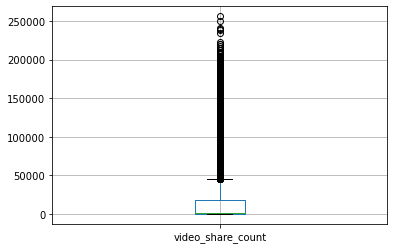

In [37]:
# Create a boxplot to visualize distribution of `video_share_count`

data.boxplot(column='video_share_count')

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video_Share_count_Histogram')

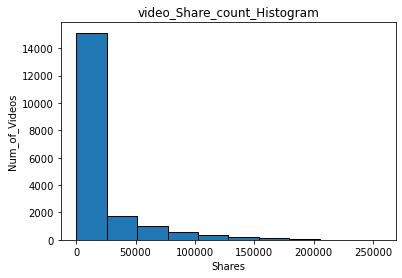

In [38]:
# Create a histogram

plt.hist(data.video_share_count, bins=10, edgecolor='Black')

plt.xlabel('Shares')
plt.ylabel('Num_of_Videos')
plt.title('video_Share_count_Histogram')


#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

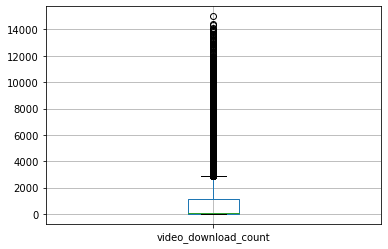

In [39]:
# Create a boxplot to visualize distribution of `video_download_count`

data.boxplot(column='video_download_count')

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'video_download_count_Histogram')

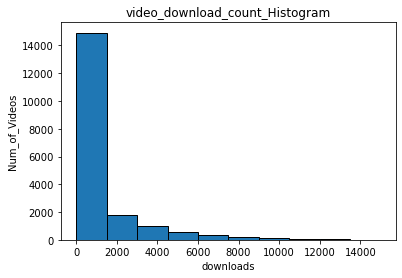

In [296]:
# Create a histogram

plt.hist(data.video_download_count, bins=10, edgecolor='Black')

plt.xlabel('downloads')
plt.ylabel('Num_of_Videos')
plt.title('video_download_count_Histogram')


**Question:** What do you notice about the distribution of this variable?

#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

Text(0.5, 1.0, 'verification_status_Histogram')

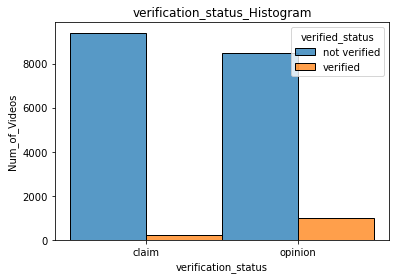

In [295]:
# Create a histogram
sns.histplot(data=data, x='claim_status', hue='verified_status', edgecolor='Black',multiple='dodge')

plt.xlabel('verification_status')
plt.ylabel('Num_of_Videos')
plt.title('verification_status_Histogram')


**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

verified users doesn't tend to make videos with opinions unlike unverified users

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

Text(0.5, 1.0, 'claim&Authur_Status_Histogram')

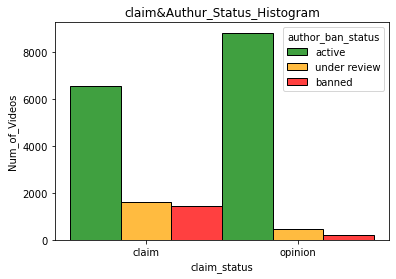

In [279]:
# Create a histogram
sns.histplot(data, x='claim_status', hue='author_ban_status', multiple='dodge', 
             hue_order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'})

plt.xlabel('claim_status')
plt.ylabel('Num_of_Videos')
plt.title('claim&Authur_Status_Histogram')



#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

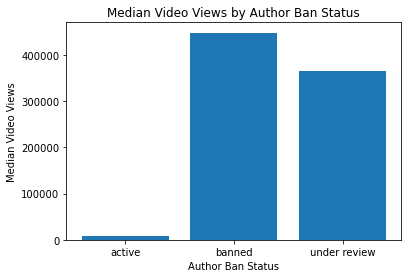

In [114]:
# Create a bar plot

df = pd.DataFrame(data)

median_views = df.groupby(['author_ban_status'])['video_view_count'].median()


plt.bar(median_views.index, median_views.values)

plt.xlabel('Author Ban Status')
plt.ylabel('Median Video Views')
plt.title('Median Video Views by Author Ban Status')

plt.show()

In [121]:
# Calculate the median view count for claim status.

median_views = df.groupby(['claim_status'])['video_view_count'].median()

median_views

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

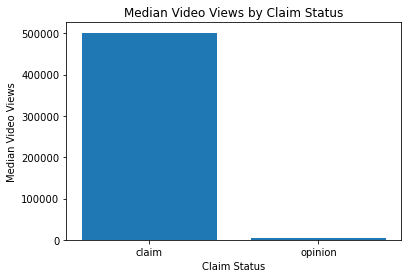

In [117]:
df = pd.DataFrame(data)

median_views = df.groupby(['claim_status'])['video_view_count'].median()


plt.bar(median_views.index, median_views.values)

plt.xlabel('Claim Status')
plt.ylabel('Median Video Views')
plt.title('Median Video Views by Claim Status')

plt.show()

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

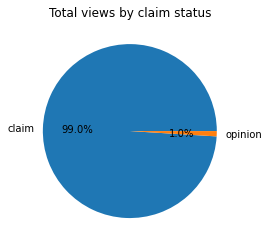

In [157]:
# Create a pie graph
plt.pie(median_views.values, labels=median_views.index, autopct='%1.1f%%')

plt.title('Total views by claim status')

plt.show()

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [242]:
for_columns = data.columns[7:]


for x in for_columns:
    
    IQR = data[x].quantile(0.75) - data[x].quantile(0.25)
    
    median = data[x].median()
    
    threshold = median + 1.5*IQR
    
    outliers = data[data[x] > threshold]
        
    cnt = len(outliers)   
    
    print(f"Column name: {x} IQR: {data[x].quantile(0.75) - data[x].quantile(0.25) }")

    print(f"Column name: {x} Median: {median}")
 
    print(f"Column name: {x} outlier threshold: {median + 1.5*IQR}")
  
    print(f"Column name: {x}, Number of outliers: {cnt} ")
   
    print('\n')

Column name: video_view_count IQR: 499384.5
Column name: video_view_count Median: 9954.5
Column name: video_view_count outlier threshold: 759031.25
Column name: video_view_count, Number of outliers: 2343 


Column name: video_like_count IQR: 124209.25
Column name: video_like_count Median: 3403.5
Column name: video_like_count outlier threshold: 189717.375
Column name: video_like_count, Number of outliers: 3468 


Column name: video_share_count IQR: 18107.0
Column name: video_share_count Median: 717.0
Column name: video_share_count outlier threshold: 27877.5
Column name: video_share_count, Number of outliers: 3732 


Column name: video_download_count IQR: 1149.25
Column name: video_download_count Median: 46.0
Column name: video_download_count outlier threshold: 1769.875
Column name: video_download_count, Number of outliers: 3733 


Column name: video_comment_count IQR: 291.0
Column name: video_comment_count Median: 9.0
Column name: video_comment_count outlier threshold: 445.5
Column name

#### **Scatterplot**

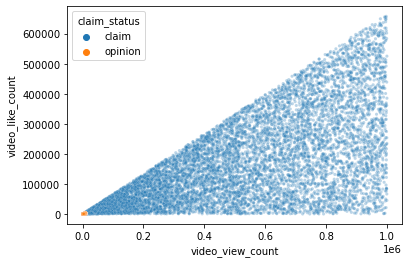

In [274]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` according to 'claim_status'

sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()